In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def gs_crit_full(df):
    overfit = np.abs(df.best_train_auc-df.best_val_auc) + np.abs(df.best_train_auc-df.best_test_auc) + \
              np.abs(df.best_train_auc-df.best_test_intra_auc)
    best_perf = 1-df.best_train_auc + 1-df.best_val_auc + 1-df.best_test_intra_auc + \
                1-df.best_test_auc
    
    return overfit + 2*best_perf

def gs_crit_best(df):
    overfit = np.abs(df.best_train_auc-df.best_val_auc)
    best_perf = 1-df.best_val_auc
    
    return overfit + 2*best_perf

def gs_crit_final(df):
    overfit = np.abs(df.train_auc-df.val_auc)
    final_perf = 1-df.val_auc
    
    return overfit + 2*final_perf

In [7]:
bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/converter_test/bdd_schiz_strat_bis.csv", index_col=0)
bdd

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,converter_activation,fusioned_latent_space_size,projection_head_name,train_loss,val_loss
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.589288,0.589189,0.592646,0.559421,0.594013,0.596881,0.602839,0.589594,sigmoid,10,linear,1.348841,1.326982
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.840611,0.649896,0.508457,0.609606,0.708907,0.653638,0.554968,0.588054,relu,10,linear,1.235763,1.322850
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.997629,0.543035,0.442616,0.491379,0.654857,0.604574,0.553609,0.588978,linear,10,linear,0.849359,1.688439
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.637069,0.616216,0.596497,0.610068,0.591032,0.571310,0.591740,0.597137,sigmoid,10,sigmoid,1.344794,1.314620
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.626001,0.624116,0.564180,0.586823,0.635083,0.630561,0.547871,0.629310,relu,10,sigmoid,1.328189,1.303654
5,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.667195,0.597297,0.508457,0.624692,0.644789,0.597921,0.526654,0.638085,linear,10,sigmoid,1.327190,1.317596
6,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.646294,0.626195,0.495319,0.592057,0.534538,0.561538,0.470100,0.509236,sigmoid,10,relu,1.324919,1.349860
7,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.627663,0.627027,0.591211,0.611453,0.617055,0.608316,0.585171,0.623768,relu,10,relu,1.323415,1.307188
8,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.795715,0.556757,0.525370,0.547106,0.670990,0.667360,0.529296,0.587746,linear,10,relu,1.275517,1.390710
9,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.539484,0.527235,0.489127,0.564963,0.560054,0.591476,0.613863,0.564501,sigmoid,-1,sigmoid,1.327058,1.316525


In [13]:
bdd['critere'] = np.abs(bdd.train_auc - bdd.val_auc) + 2*(1-bdd.val_auc) #+ 2*(1-bdd.test_auc)
bdd['critere_best'] = np.abs(bdd.best_train_auc - bdd.best_val_auc) + 2*(1-bdd.best_val_auc)
bdd['combined_crit'] = (bdd.critere + bdd.critere_best) / 2
bdd.sort_values(by='combined_crit')

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,converter_activation,fusioned_latent_space_size,projection_head_name,train_loss,val_loss,critere,critere_best,combined_crit
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.626001,0.624116,0.564180,0.586823,0.635083,0.630561,0.547871,0.629310,relu,10,sigmoid,1.328189,1.303654,0.753652,0.743399,0.748526
10,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.639029,0.632432,0.591664,0.605296,0.613846,0.617879,0.607369,0.611761,sigmoid,-1,relu,1.339022,1.308176,0.741732,0.768274,0.755003
7,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.627663,0.627027,0.591211,0.611453,0.617055,0.608316,0.585171,0.623768,relu,10,relu,1.323415,1.307188,0.746582,0.792107,0.769345
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.589288,0.589189,0.592646,0.559421,0.594013,0.596881,0.602839,0.589594,sigmoid,10,linear,1.348841,1.326982,0.821720,0.809106,0.815413
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.840611,0.649896,0.508457,0.609606,0.708907,0.653638,0.554968,0.588054,relu,10,linear,1.235763,1.322850,0.890923,0.747992,0.819458
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.637069,0.616216,0.596497,0.610068,0.591032,0.571310,0.591740,0.597137,sigmoid,10,sigmoid,1.344794,1.314620,0.788420,0.877103,0.832762
6,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.646294,0.626195,0.495319,0.592057,0.534538,0.561538,0.470100,0.509236,sigmoid,10,relu,1.324919,1.349860,0.767707,0.903924,0.835815
5,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.667195,0.597297,0.508457,0.624692,0.644789,0.597921,0.526654,0.638085,linear,10,sigmoid,1.327190,1.317596,0.875303,0.851026,0.863165
8,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.795715,0.556757,0.525370,0.547106,0.670990,0.667360,0.529296,0.587746,linear,10,relu,1.275517,1.390710,1.125445,0.668911,0.897178
9,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.539484,0.527235,0.489127,0.564963,0.560054,0.591476,0.613863,0.564501,sigmoid,-1,sigmoid,1.327058,1.316525,0.957779,0.848470,0.903124


# Link between gs_crit and test_auc

## S.or.

In [7]:
bdd_sor = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/S.or./bdd_Sor_both.csv", index_col=0)
bdd_sor['best_crit_full'] = gs_crit_full(bdd_sor)
bdd_sor['best_crit'] = gs_crit_best(bdd_sor)
bdd_sor['final_crit'] = gs_crit_final(bdd_sor)

bdd_sor

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss,best_crit_full,best_crit,final_crit
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.572733,0.540541,0.514044,0.507081,0.479375,0.584823,0.405618,0.392549,0.181289,0.030664,6,0.234947,1.359376,4.541301,0.935802,0.951112
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.558994,0.523909,0.469345,0.470443,0.588914,0.557173,0.480973,0.530788,0.183271,0.005578,2,0.228486,1.350043,3.882114,0.917397,0.987268
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.976833,0.530561,0.482483,0.605296,0.825220,0.579626,0.457113,0.532635,0.028573,0.001039,0,0.140877,0.797338,4.117098,1.086343,1.385149
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.854677,0.444075,0.534582,0.590517,0.610851,0.549272,0.470100,0.511392,0.171800,0.000428,5,0.109374,1.177171,4.018560,0.963034,1.522452
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.997042,0.493139,0.505587,0.567118,0.656887,0.565904,0.493204,0.514163,0.126039,0.000195,2,0.132180,0.961317,3.937073,0.959174,1.517624
5,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.566682,0.523909,0.527182,0.520628,0.579108,0.575884,0.455452,0.541872,0.185959,0.043861,4,0.280424,1.350729,3.859487,0.851457,0.994956
6,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.556713,0.610603,0.461870,0.574046,0.567682,0.602079,0.467834,0.558805,0.198094,0.046071,5,0.079883,1.621132,3.750319,0.830239,0.832685
7,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.424903,0.411227,0.554817,0.448276,0.569482,0.583784,0.428118,0.494766,0.197219,0.019098,6,0.352504,1.357357,4.078081,0.846734,1.191223
8,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.428137,0.377547,0.557913,0.433190,0.592253,0.612058,0.455301,0.575123,0.187572,0.052213,1,0.258847,1.352152,3.704418,0.795689,1.295496
9,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.465016,0.437838,0.495772,0.521860,0.575460,0.613721,0.489731,0.501693,0.180442,0.087231,3,0.022244,1.342444,3.836544,0.810818,1.151502


### final crit

<Axes: xlabel='final_crit', ylabel='best_test_auc'>

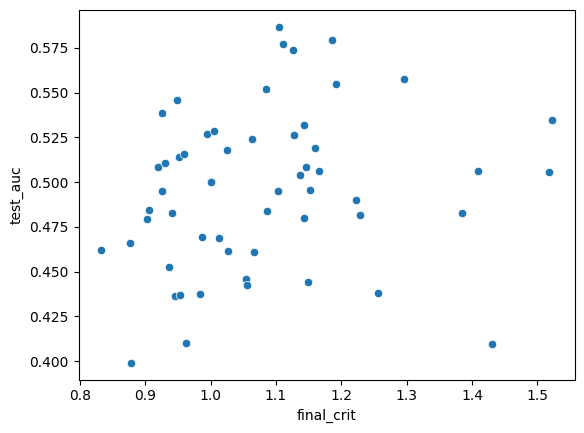

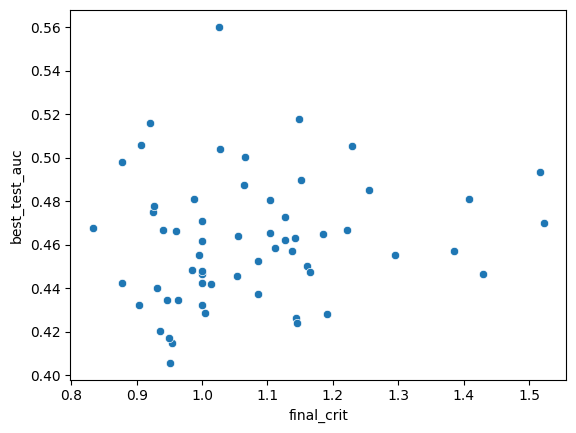

In [9]:
# link with test_auc
sns.scatterplot(bdd_sor, x='final_crit', y='test_auc')
plt.figure()
sns.scatterplot(bdd_sor, x='final_crit', y='best_test_auc')

<Axes: xlabel='final_crit', ylabel='best_test_intra_auc'>

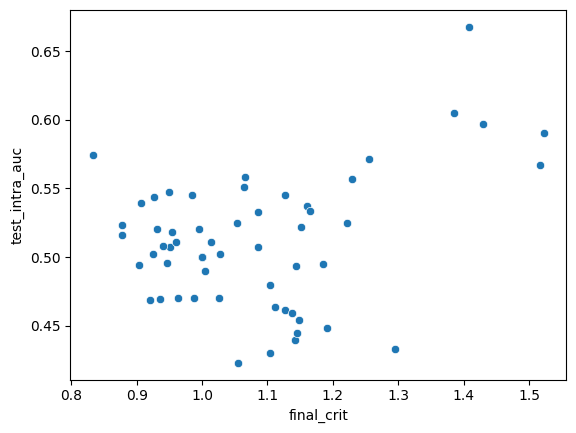

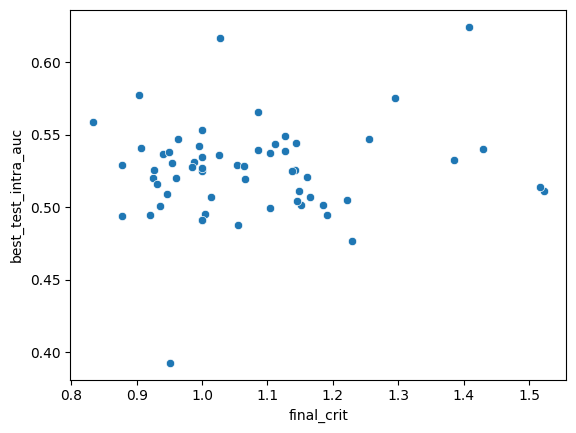

In [10]:
# link with test_intra_auc
sns.scatterplot(bdd_sor, x='final_crit', y='test_intra_auc')
plt.figure()
sns.scatterplot(bdd_sor, x='final_crit', y='best_test_intra_auc')

### best_crit

<Axes: xlabel='best_crit', ylabel='best_test_auc'>

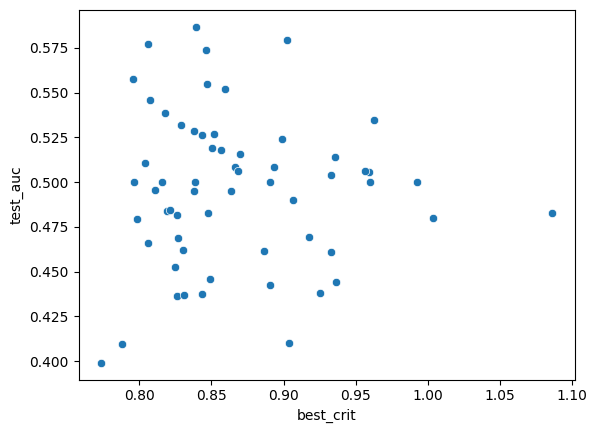

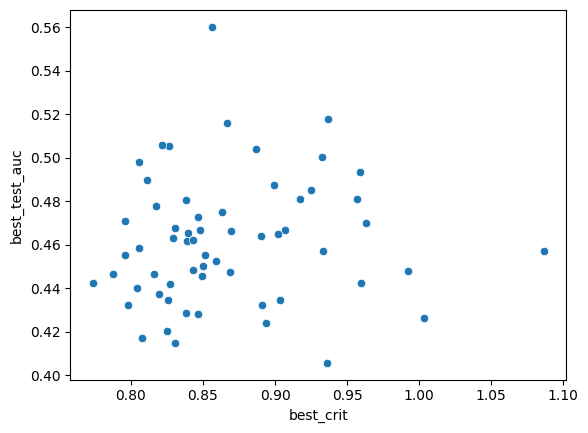

In [13]:
# link with test_auc
sns.scatterplot(bdd_sor, x='best_crit', y='test_auc')
plt.figure()
sns.scatterplot(bdd_sor, x='best_crit', y='best_test_auc')

<Axes: xlabel='best_crit', ylabel='best_test_intra_auc'>

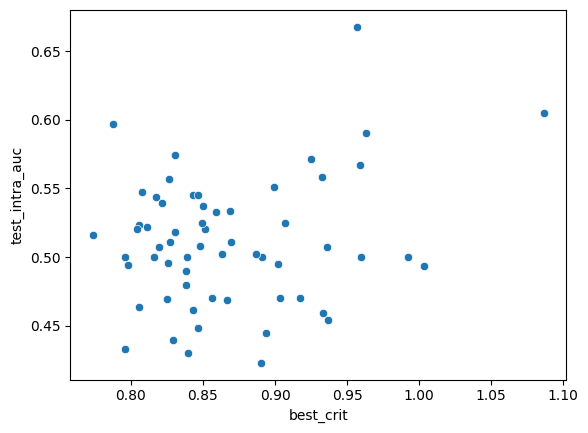

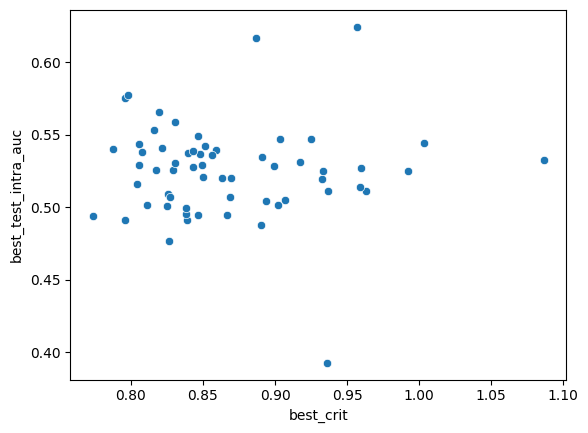

In [14]:
# link with test_intra_auc
sns.scatterplot(bdd_sor, x='best_crit', y='test_intra_auc')
plt.figure()
sns.scatterplot(bdd_sor, x='best_crit', y='best_test_intra_auc')

## CINGULATE

In [15]:
bdd_cing = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step1/3gs_cing_schiz/bdd_cing_schiz.csv", index_col=0)
bdd_cing['best_crit_full'] = gs_crit_full(bdd_cing)
bdd_cing['best_crit'] = gs_crit_best(bdd_cing)
bdd_cing['final_crit'] = gs_crit_final(bdd_cing)

bdd_cing

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,...,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss,best_crit_full,best_crit,final_crit
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.602849,0.622661,0.584491,0.623615,0.602626,0.636590,0.555044,0.640856,32,...,0.058311,4,0.009101,5,sigmoid,0.258506,1.339087,3.249544,0.760783,0.774490
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.899369,0.581289,0.492751,0.532635,0.731134,0.667360,0.532619,0.544027,10,...,0.040136,4,0.001487,5,relu,0.447041,1.052452,3.499118,0.729055,1.155502
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.985310,0.521830,0.548928,0.557882,0.728284,0.635759,0.578828,0.639470,4,...,0.131287,10,0.000103,3,relu,0.149783,1.045123,3.166112,0.821008,1.419822
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.585417,0.553430,0.564482,0.644397,0.582487,0.644075,0.597101,0.672414,10,...,0.091070,4,0.076253,4,relu,0.233524,1.345705,3.173976,0.773438,0.925126
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.994285,0.579210,0.509363,0.575739,0.637104,0.655717,0.569918,0.615764,32,...,0.125742,-1,0.000859,0,linear,0.170546,0.774936,3.150133,0.707179,1.256655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.819597,0.533472,0.511930,0.528941,0.611620,0.647817,0.530353,0.610837,32,...,0.150683,32,0.000249,5,sigmoid,0.245872,1.219315,3.316990,0.740563,1.219181
139,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.410923,0.406445,0.446844,0.359606,0.578897,0.625364,0.560933,0.610222,32,...,0.109965,10,0.009245,5,sigmoid,0.155720,1.352224,3.344923,0.795739,1.191588
140,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.968024,0.525988,0.590456,0.601909,0.648472,0.613306,0.603594,0.596675,4,...,0.116883,10,0.000461,0,relu,0.197987,0.919949,3.207748,0.808555,1.390061
141,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.503301,0.500000,0.506494,0.491379,0.589967,0.602079,0.562066,0.584206,32,...,0.165056,-1,0.008588,0,sigmoid,0.057601,1.347987,3.369139,0.807954,1.003301


<Axes: xlabel='final_crit', ylabel='best_test_intra_auc'>

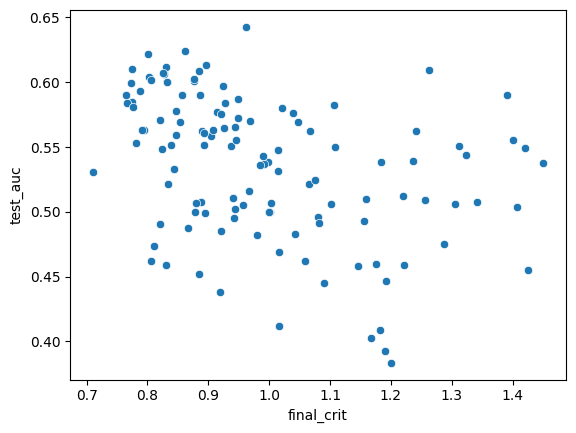

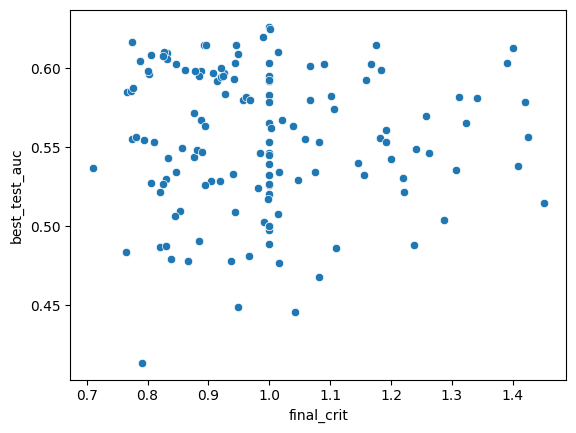

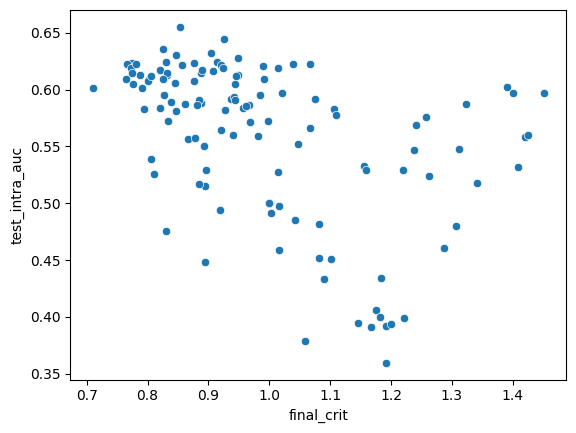

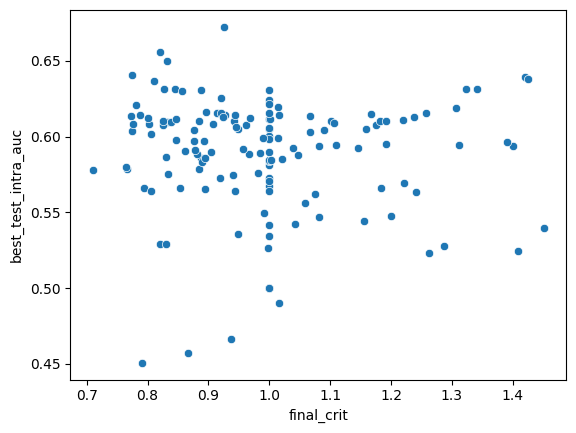

In [18]:
# link with test_auc
sns.scatterplot(bdd_cing, x='final_crit', y='test_auc')
plt.figure()
sns.scatterplot(bdd_cing, x='final_crit', y='best_test_auc')

plt.figure()
# link with test_intra_auc
sns.scatterplot(bdd_cing, x='final_crit', y='test_intra_auc')
plt.figure()
sns.scatterplot(bdd_cing, x='final_crit', y='best_test_intra_auc')

### best_crit

<Axes: xlabel='best_crit', ylabel='best_test_intra_auc'>

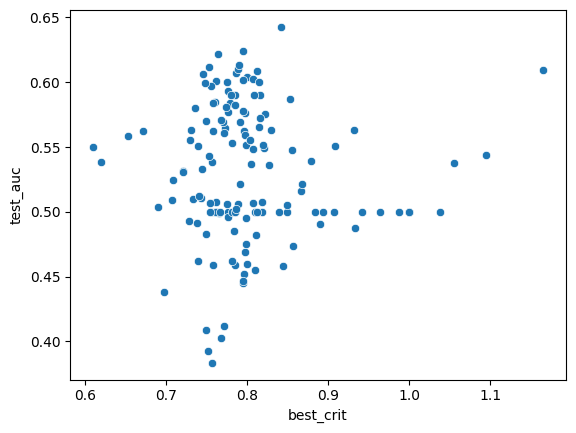

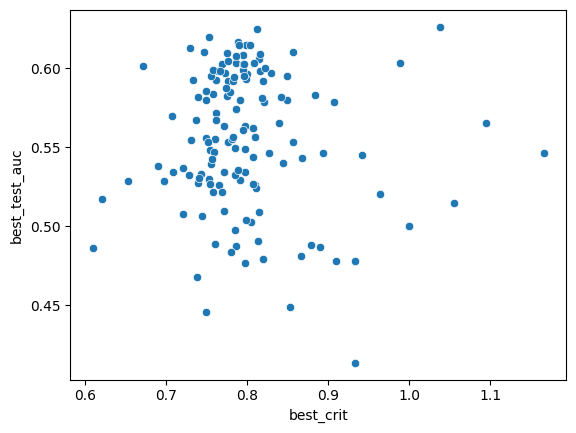

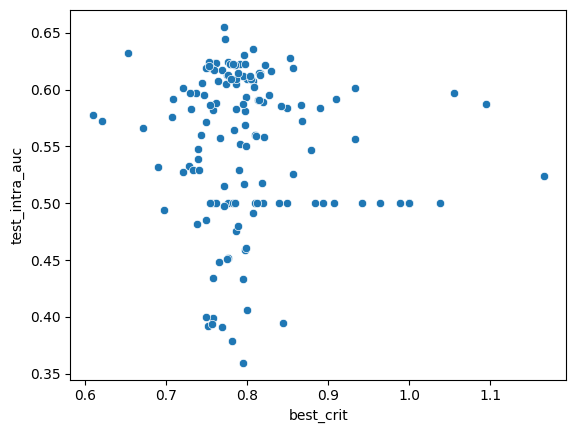

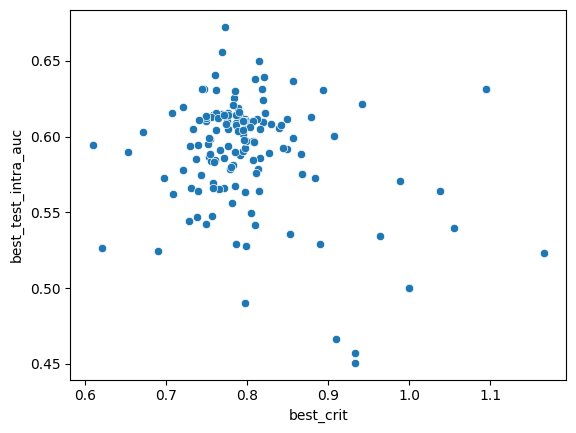

In [19]:
# link with test_auc
sns.scatterplot(bdd_cing, x='best_crit', y='test_auc')
plt.figure()
sns.scatterplot(bdd_cing, x='best_crit', y='best_test_auc')

plt.figure()
# link with test_intra_auc
sns.scatterplot(bdd_cing, x='best_crit', y='test_intra_auc')
plt.figure()
sns.scatterplot(bdd_cing, x='best_crit', y='best_test_intra_auc')

## Pericalcarine

In [20]:
bdd_pcc = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/pericalcarine/bdd_pericalcarine_both.csv", index_col=0)
bdd_pcc['best_crit_full'] = gs_crit_full(bdd_pcc)
bdd_pcc['best_crit'] = gs_crit_best(bdd_pcc)
bdd_pcc['final_crit'] = gs_crit_final(bdd_pcc)

bdd_pcc

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss,best_crit_full,best_crit,final_crit
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.704169,0.607484,0.475989,0.648091,0.619461,0.624116,0.544397,0.640394,0.296929,0.001980,10,0.204315,1.270310,3.243913,0.756422,0.881716
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.673136,0.584615,0.544095,0.629926,0.603920,0.613306,0.541981,0.654249,0.078573,0.002264,5,0.040576,1.307342,3.294743,0.782775,0.919290
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.531221,0.623701,0.531561,0.696275,0.153283,0.400237,9,0.012693,17133.101562,3.492356,0.845078,1.000000
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.519099,0.508108,0.500151,0.553879,0.543384,0.604158,0.511175,0.657328,0.045268,0.084149,3,0.218265,1.346726,3.574837,0.852458,0.994775
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.508317,0.493971,0.536998,0.510468,0.534495,0.563410,0.487919,0.543103,0.330487,0.006950,1,0.362806,1.343245,3.826244,0.902095,1.026405
5,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.940289,0.505613,0.508910,0.551416,0.595336,0.659044,0.538055,0.625000,0.069306,0.001646,6,0.018243,0.942862,3.315782,0.745620,1.423449
6,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.549451,0.611850,0.551948,0.556188,0.551055,0.604990,0.572335,0.568042,0.102405,0.034395,4,0.365190,1.359043,3.499360,0.843956,0.838699
7,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.730731,0.554262,0.541377,0.518781,0.580697,0.653638,0.515101,0.664409,0.070430,0.002952,4,0.006194,1.257750,3.394558,0.765665,1.067945
8,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.508325,0.552183,0.552401,0.666102,0.538032,0.571726,0.528617,0.611299,0.282793,0.001123,8,0.054250,1.352268,3.617028,0.890242,0.939492
9,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.847394,0.647817,0.463304,0.616687,0.772302,0.661538,0.535035,0.609914,0.007678,0.002097,7,0.008789,1.174820,3.352842,0.787687,0.903943


### final crit

<Axes: xlabel='final_crit', ylabel='best_test_intra_auc'>

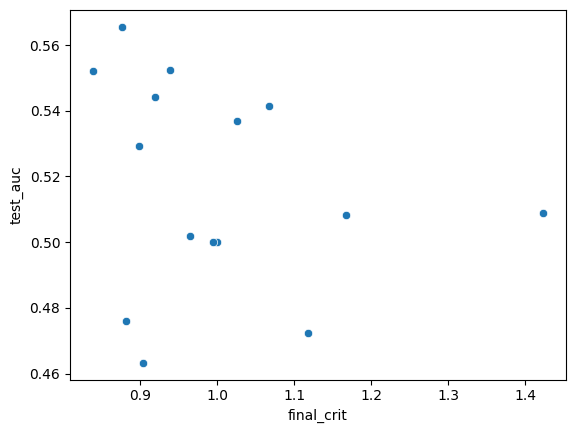

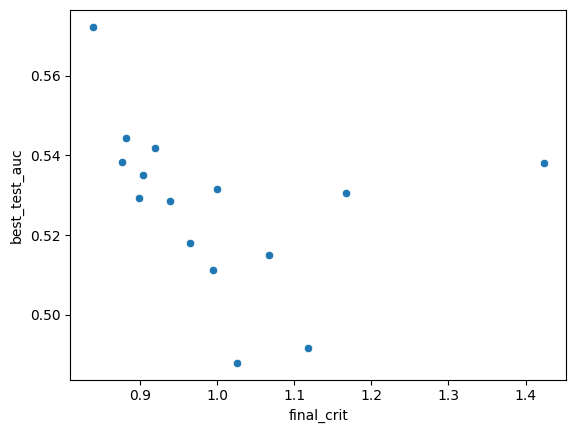

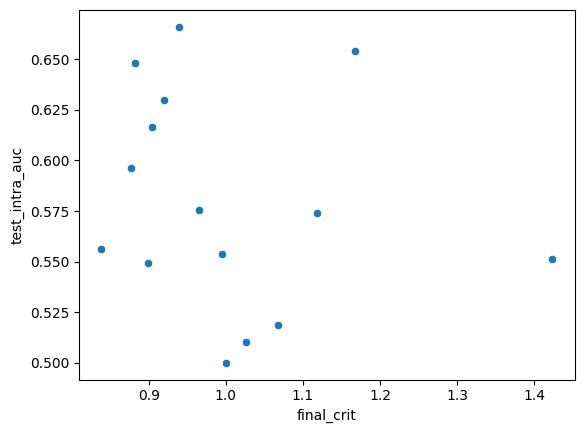

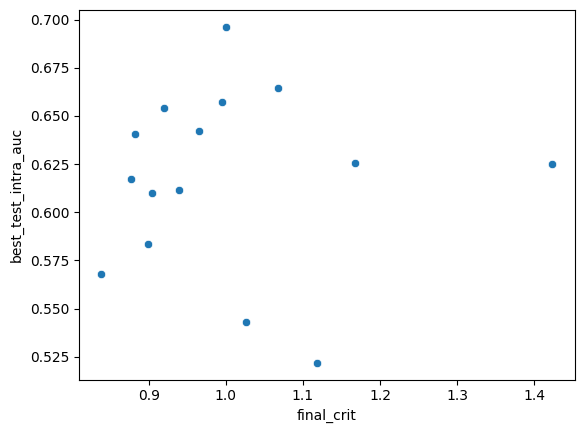

In [21]:
# link with test_auc
sns.scatterplot(bdd_pcc, x='final_crit', y='test_auc')
plt.figure()
sns.scatterplot(bdd_pcc, x='final_crit', y='best_test_auc')

plt.figure()
# link with test_intra_auc
sns.scatterplot(bdd_pcc, x='final_crit', y='test_intra_auc')
plt.figure()
sns.scatterplot(bdd_pcc, x='final_crit', y='best_test_intra_auc')

### best crit

<Axes: xlabel='best_crit', ylabel='best_test_intra_auc'>

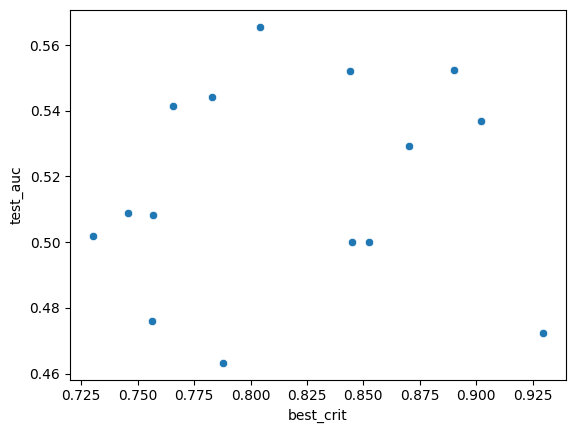

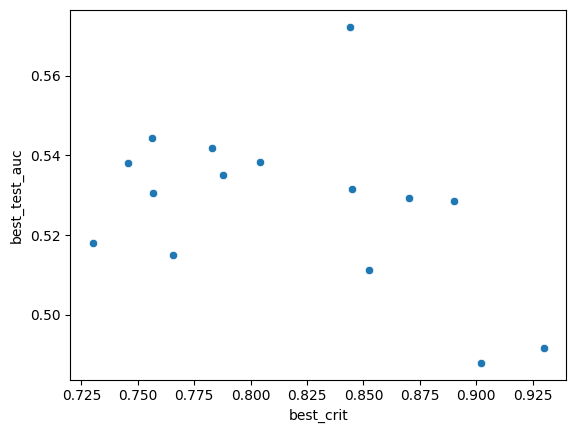

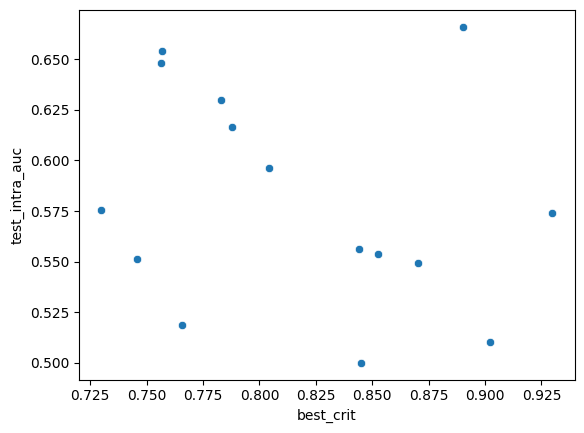

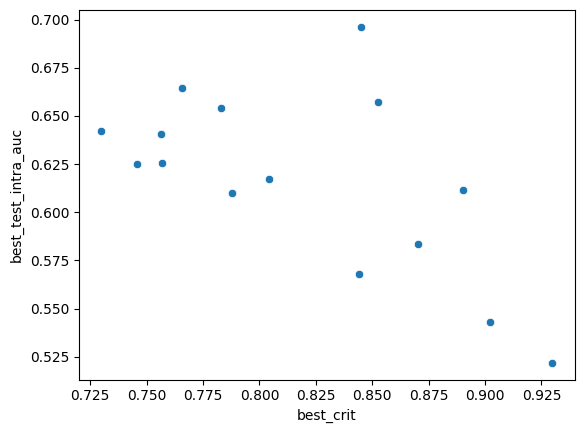

In [22]:
# link with test_auc
sns.scatterplot(bdd_pcc, x='best_crit', y='test_auc')
plt.figure()
sns.scatterplot(bdd_pcc, x='best_crit', y='best_test_auc')

plt.figure()
# link with test_intra_auc
sns.scatterplot(bdd_pcc, x='best_crit', y='test_intra_auc')
plt.figure()
sns.scatterplot(bdd_pcc, x='best_crit', y='best_test_intra_auc')